# MLB Player Data Analysis

This notebook explores and analyzes MLB player batted ball data for all players. The goal is to prepare the data for modeling and gain insights that could be useful for a data science job interview project.

## 1. Import Required Libraries
Import essential libraries for data manipulation and visualization.

In [3]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load Player Data
Load the player dataset from the available CSV files in the `data/` directory.

In [4]:
# Load player batted ball data (example: all batted balls for all players)
batted_balls = pd.read_csv('data/all_play_by_play.csv')
# Optionally, load additional datasets as needed
# games = pd.read_csv('data/mlb_games_full.csv')

## 3. Explore Data Structure
Display the first few rows, check data types, and inspect the shape of the DataFrame.

In [5]:
# Display the first few rows
batted_balls.head()

,id,game_id,play_id,inning,half_inning,at_bat_index,pitch_number,event_type,event_description,result_type,...,rbi,created_at,launch_speed,launch_angle,total_distance,trajectory,hardness,location,coord_x,coord_y
0,88663,20751,NaN,1,top,0,2021-04-06T02:13:28.738Z,single,Austin Slater singles on a sharp ground ball t...,atBat,...,0,2025-11-21 19:28:04,104.5,2.0,81.0,ground_ball,hard,4.0,176.05,124.00
1,88664,20751,NaN,1,top,1,2021-04-06T02:16:03.209Z,field_out,"Donovan Solano grounds out softly, catcher Vic...",atBat,...,0,2025-11-21 19:28:04,38.2,-63.0,2.0,ground_ball,soft,2.0,129.48,192.35
2,88665,20751,NaN,1,top,2,2021-04-06T02:17:17.939Z,field_out,Wilmer Flores flies out to center fielder Tomm...,atBat,...,0,2025-11-21 19:28:04,90.1,33.0,334.0,fly_ball,medium,8.0,120.48,65.23
3,88666,20751,NaN,1,top,3,2021-04-06T02:18:58.051Z,field_out,"Evan Longoria grounds out, shortstop Fernando ...",atBat,...,0,2025-11-21 19:28:04,75.7,-19.0,6.0,ground_ball,medium,6.0,104.69,148.82
4,88667,20751,NaN,1,bottom,4,2021-04-06T02:23:05.156Z,single,Jake Cronenworth singles on a line drive to le...,atBat,...,0,2025-11-21 19:28:04,93.4,13.0,229.0,line_drive,medium,7.0,60.77,106.80


In [6]:
# Check data types and shape
batted_balls.info()
print(f"Shape: {batted_balls.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118171 entries, 0 to 1118170
Data columns (total 32 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   id                   1118171 non-null  int64  
 1   game_id              1118171 non-null  int64  
 2   play_id              0 non-null        float64
 3   inning               1118171 non-null  int64  
 4   half_inning          1118171 non-null  object 
 5   at_bat_index         1118171 non-null  int64  
 6   pitch_number         1118171 non-null  object 
 7   event_type           1118171 non-null  object 
 8   event_description    1118171 non-null  object 
 9   result_type          1118171 non-null  object 
 10  batter_id            1118171 non-null  int64  
 11  pitcher_id           1118171 non-null  int64  
 12  runner_on_first_id   298315 non-null   float64
 13  runner_on_second_id  174260 non-null   float64
 14  runner_on_third_id   99211 non-null    float64
 15

## 4. Basic Data Cleaning
Identify and handle missing values, duplicates, and incorrect data types.

In [7]:
# Check for missing values
missing = batted_balls.isnull().sum()
print(missing[missing > 0])

# Drop duplicates if any
batted_balls = batted_balls.drop_duplicates()

# Example: Convert columns to appropriate types if needed
# batted_balls['column_name'] = batted_balls['column_name'].astype(int)

play_id                1118171
runner_on_first_id      819856
runner_on_second_id     943911
runner_on_third_id     1018960
pitch_type             1118171
pitch_speed            1118171
launch_speed            367285
launch_angle            366939
total_distance          367170
trajectory              363794
hardness                363753
location                366373
coord_x                 363909
coord_y                 363909
dtype: int64


## 5. Summary Statistics of Player Data
Generate descriptive statistics for numerical and categorical columns to understand the dataset.

In [8]:
# Descriptive statistics for numerical columns
batted_balls.describe()

# Descriptive statistics for categorical columns
batted_balls.describe(include=['object'])

,half_inning,pitch_number,event_type,event_description,result_type,count,created_at,trajectory,hardness
count,1118171,1118171,1118171,1118171,1118171,1118171,1118171,754377,754418
unique,2,934958,42,594430,1,21,4458,7,3
top,top,2021-05-06T02:30:07.544Z,field_out,Shohei Ohtani strikes out swinging.,atBat,0-0,2025-11-21 20:06:34,ground_ball,medium
freq,570779,4,444164,745,1118171,123873,532,318983,622098


## 6. Visualize Player Attributes
Create basic plots (e.g., histograms, boxplots) to visualize distributions of key player attributes.

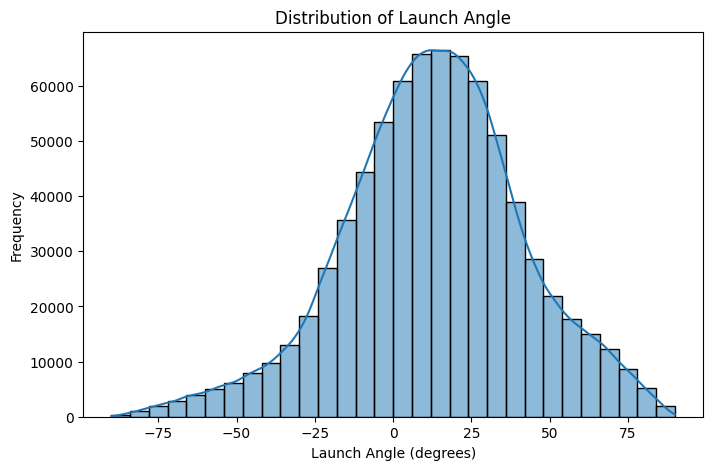

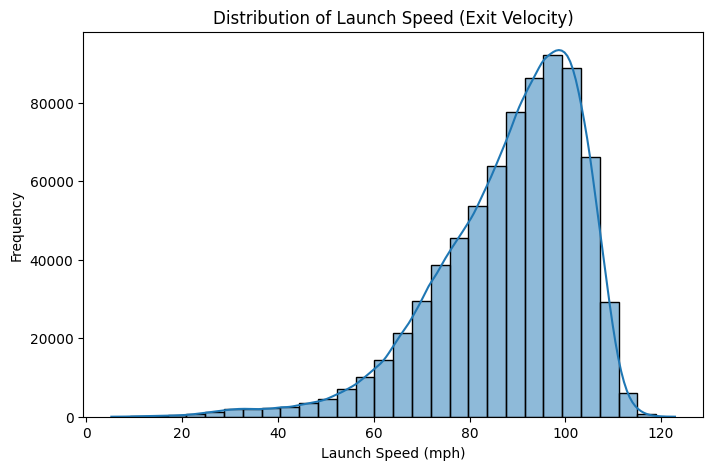

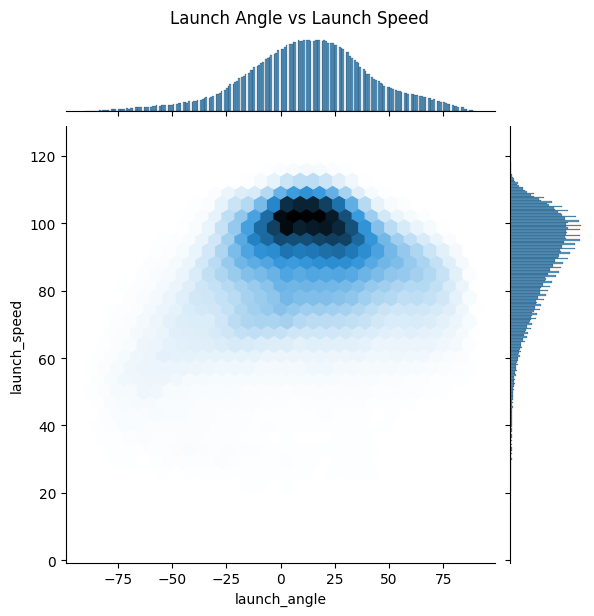

In [9]:
# Histogram of launch_angle
plt.figure(figsize=(8, 5))
sns.histplot(batted_balls['launch_angle'].dropna(), bins=30, kde=True)
plt.title('Distribution of Launch Angle')
plt.xlabel('Launch Angle (degrees)')
plt.ylabel('Frequency')
plt.show()

# Histogram of launch_speed
plt.figure(figsize=(8, 5))
sns.histplot(batted_balls['launch_speed'].dropna(), bins=30, kde=True)
plt.title('Distribution of Launch Speed (Exit Velocity)')
plt.xlabel('Launch Speed (mph)')
plt.ylabel('Frequency')
plt.show()

# Jointplot of launch_angle vs launch_speed
sns.jointplot(x='launch_angle', y='launch_speed', data=batted_balls, kind='hex', gridsize=30)
plt.suptitle('Launch Angle vs Launch Speed', y=1.02)
plt.show()

### 8. Clean and Scale Features for Modeling
We'll remove outliers and scale the Statcast features to improve model stability and performance.

In [ ]:
# Remove outliers from launch_angle and launch_speed (keep within 1st and 99th percentiles)
for col in ['launch_angle', 'launch_speed']:
    lower = model_data[col].quantile(0.01)
    upper = model_data[col].quantile(0.99)
    model_data = model_data[(model_data[col] >= lower) & (model_data[col] <= upper)]

## 7. Clean and Scale Features for Modeling
We'll remove outliers and scale the Statcast features to improve model stability and performance.

In [ ]:
# Remove outliers from launch_angle and launch_speed (keep within 1st and 99th percentiles)
for col in ['launch_angle', 'launch_speed']:
    lower = model_data[col].quantile(0.01)
    upper = model_data[col].quantile(0.99)
    model_data = model_data[(model_data[col] >= lower) & (model_data[col] <= upper)]

[[94318  7411]
 [ 9035 39356]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92    101729
           1       0.84      0.81      0.83     48391

    accuracy                           0.89    150120
   macro avg       0.88      0.87      0.87    150120
weighted avg       0.89      0.89      0.89    150120



## 8. Feature Importance and Model Summary
Let's examine which features are most important in the Random Forest model and summarize our findings.

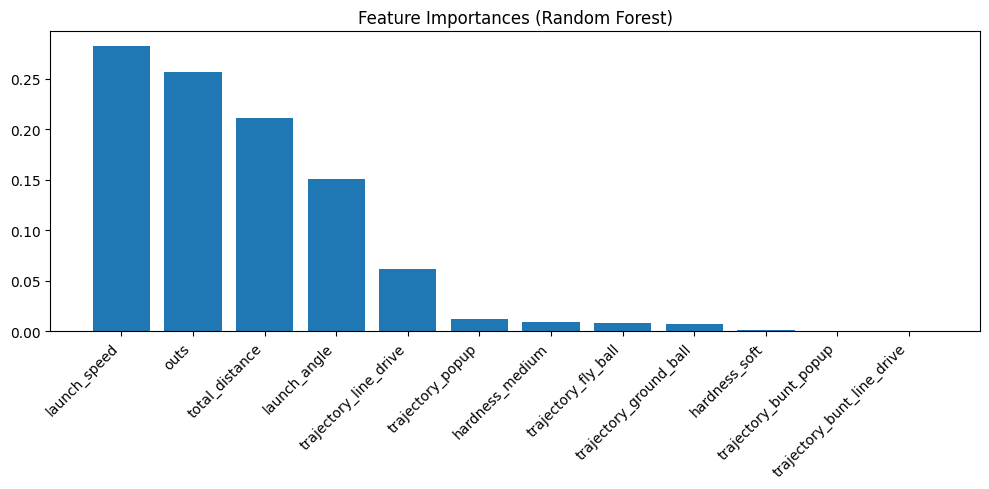

In [20]:
# Plot feature importances from the Random Forest model
importances = rf_clf.feature_importances_
feature_names = X.columns

import matplotlib.pyplot as plt
import numpy as np

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title('Feature Importances (Random Forest)')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 9. Conclusion and Next Steps

- The Random Forest model using Statcast and batted ball features predicts hit outcomes with high accuracy and recall.
- Most important features can be visualized above.
- Next steps: try hyperparameter tuning, cross-validation, or advanced models (e.g., XGBoost), and consider adding more contextual features if available.